In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from tensorflow.keras.applications import resnet
from keras.models import *
from keras.layers import *
import keras
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from sklearn.metrics import classification_report
import time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import visualkeras

In [10]:
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_169.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_170.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_171.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348_cell_138.png
dataset\ce

dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_14.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_15.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_16.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_17.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_18.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_19.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_2.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_20.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_21.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_22.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_134636_cell_23.png
dataset\cell_images\ce

dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_61.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_62.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_63.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_64.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_65.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_66.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_67.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_68.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_69.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_70.png
dataset\cell_images\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163251_cell_71.png
dataset\cell_images\c

dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_180.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_181.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_182.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_183.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_184.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_185.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_186.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_187.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_188.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153453_cell_189.png
dataset\cell_images\cell_images\Parasitized\C179P140ThinF_IMG_20151127_153521_cell_162.png

dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_154.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_155.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_156.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_157.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_158.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_159.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_160.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_161.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_162.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_163.png
dataset\cell_images\cell_images\Parasitized\C184P145ThinF_IMG_20151203_104153_cell_164.png

dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_132.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_133.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_134.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_135.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_136.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_137.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_138.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_100.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_101.png
dataset\cell_images\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_102.png
dataset\cell_images\cell_image

dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152337_cell_168.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152337_cell_169.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152455_cell_174.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152613_cell_197.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152921_cell_182.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152921_cell_183.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_152921_cell_184.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_153401_cell_194.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_153401_cell_195.png
dataset\cell_images\cell_images\Parasitized\C64P25N_ThinF_IMG_20150818_153517_cell_209.png
dataset\cell_images\cell_images\Parasitized\C65P26N_ThinF_IMG_20150818_154010_cell_199.png

dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124010_cell_209.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124010_cell_210.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124010_cell_211.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_152.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_153.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_154.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_155.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_156.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_157.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_158.png
dataset\cell_images\cell_images\Parasitized\C82P43ThinF_IMG_20150817_124418_cell_159.png
dataset\cell_images\c

dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_48.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_65.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_108.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_120.png
dataset\cell_images\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_125.png
dataset\cell_images\cell_i

dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133244_cell_54.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133244_cell_68.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133244_cell_76.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133244_cell_78.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133244_cell_89.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133329_cell_10.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133329_cell_18.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133329_cell_36.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133329_cell_49.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133329_cell_65.png
dataset\cell_images\cell_images\Uninfected\C129P90ThinF_IMG_20151004_133329_cell_71.png
dataset\cell_images\cell_images\

dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_259.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_266.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_272.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_292.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_31.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_40.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114555_cell_8.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114629_cell_111.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114629_cell_157.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114629_cell_239.png
dataset\cell_images\cell_images\Uninfected\C149P110ThinF_IMG_20151115_114629_cell_241.png
dataset\cell_i

dataset\cell_images\cell_images\Uninfected\C170P131ThinF_IMG_20151119_120233_cell_99.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_106.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_117.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_140.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_141.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_146.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_175.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_47.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_50.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_76.png
dataset\cell_images\cell_images\Uninfected\C171P132ThinF_IMG_20151119_152913_cell_83.png
dataset\cell_im

dataset\cell_images\cell_images\Uninfected\C209ThinF_IMG_20151029_160927_cell_90.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_107.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_129.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_150.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_151.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_185.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_195.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_209.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_247.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_37.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_20151029_162357_cell_48.png
dataset\cell_images\cell_images\Uninfected\C210ThinF_IMG_

dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160059_cell_91.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_104.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_162.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_187.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_196.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_216.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_217.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_220.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_233.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_28.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_20151112_160129_cell_39.png
dataset\cell_images\cell_images\Uninfected\C233ThinF_IMG_

dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122648_cell_146.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122648_cell_151.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122648_cell_161.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122648_cell_25.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122648_cell_4.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122648_cell_43.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122846_cell_1.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122846_cell_100.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122846_cell_111.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122846_cell_115.png
dataset\cell_images\cell_images\Uninfected\C58P19thinF_IMG_20150802_122846_cell_122.png
dataset\cell_images\cell_images\Uninfe

dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_115942_cell_84.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_115942_cell_95.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_1.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_113.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_122.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_135.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_142.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_149.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_177.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_74.png
dataset\cell_images\cell_images\Uninfected\C81P42ThinF_IMG_20150817_120351_cell_76.png
dataset\cell_images\cell_images\Uninfe

dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_169.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_170.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_171.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348_cell_138.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348_cell_139.png
dataset\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348

dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141504_cell_150.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141504_cell_151.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141504_cell_152.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141504_cell_153.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141504_cell_154.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141504_cell_155.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825_cell_130.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825_cell_131.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825_cell_132.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825_cell_133.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825_cell_134.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825_cell_135.png
dataset\cell_images\Parasitized\C130P91ThinF_IMG_20151004_141825

dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_69.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_70.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_71.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_72.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_73.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_74.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_75.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_76.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_77.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_78.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_79.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_80.png
dataset\cell_images\Parasitized\C137P98ThinF_IMG_20151005_163901_cell_81.png

dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_183.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_184.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_185.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_186.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_187.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_188.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_189.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_190.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_191.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_192.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_193.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_164714_cell_194.png
dataset\cell_images\Parasitized\C180P141

dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150557_cell_190.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150557_cell_191.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150557_cell_192.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_129.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_130.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_131.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_132.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_133.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_134.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_135.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_136.png
dataset\cell_images\Parasitized\C186P147NThinF_IMG_20151203_150808_cell_137.png
dataset\cell_images\Parasitized\C186P147

dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_174.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_175.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_176.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_177.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_178.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_179.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_180.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_181.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_182.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_183.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_184.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_185.png
dataset\cell_images\Parasitized\C59P20thinF_IMG_20150803_112802_cell_186.png

dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131457_cell_9.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_100.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_101.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_102.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_103.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_104.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_105.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_90.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_91.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_92.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_93.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_94.png
dataset\cell_images\Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_9

dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_203.png
dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_204.png
dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_205.png
dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_206.png
dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_207.png
dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_208.png
dataset\cell_images\Parasitized\C98P59ThinF_IMG_20150917_154452_cell_209.png
dataset\cell_images\Parasitized\C99P60ThinF_IMG_20150918_140900_cell_100.png
dataset\cell_images\Parasitized\C99P60ThinF_IMG_20150918_140900_cell_101.png
dataset\cell_images\Parasitized\C99P60ThinF_IMG_20150918_140900_cell_102.png
dataset\cell_images\Parasitized\C99P60ThinF_IMG_20150918_140900_cell_103.png
dataset\cell_images\Parasitized\C99P60ThinF_IMG_20150918_140900_cell_104.png
dataset\cell_images\Parasitized\C99P60ThinF_IMG_20150918_140900_cell_105.png

dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_129.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_135.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_157.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_36.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_38.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_47.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_60.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_134949_cell_77.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_135904_cell_126.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_135904_cell_129.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_135904_cell_147.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_135904_cell_162.png
dataset\cell_images\Uninfected\C113P74ThinF_IMG_20150930_135904_cell_18.png
datas

dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210309_cell_149.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210309_cell_161.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210309_cell_42.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210309_cell_45.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_210309_cell_94.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_125.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_126.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_15.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_20.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_38.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_5.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_59.png
dataset\cell_images\Uninfected\C140P101ThinF_IMG_20151005_211530_cell_64.

dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104342_cell_141.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104342_cell_39.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104342_cell_49.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104342_cell_7.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104342_cell_75.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104342_cell_83.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_10.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_111.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_122.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_137.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_14.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_144.png
dataset\cell_images\Uninfected\C162P123ThinF_IMG_20151116_104451_cell_16

dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_182.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_194.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_212.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_24.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_40.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_51.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_102123_cell_6.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_104112_cell_100.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_104112_cell_118.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_104112_cell_126.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_104112_cell_169.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_104112_cell_181.png
dataset\cell_images\Uninfected\C203ThinF_IMG_20151029_104112_cell_195.png
dataset\cell_images\Uninfected\C203ThinF_IM

dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_18.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_234.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_245.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_29.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_59.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_65.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_7.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131546_cell_9.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131622_cell_122.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131622_cell_148.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131622_cell_15.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131622_cell_154.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20151112_131622_cell_162.png
dataset\cell_images\Uninfected\C226ThinF_IMG_20

dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205558_cell_49.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205558_cell_55.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205558_cell_66.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205558_cell_86.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205719_cell_101.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205719_cell_127.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205719_cell_20.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205719_cell_22.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205719_cell_56.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205719_cell_58.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205756_cell_10.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205756_cell_111.png
dataset\cell_images\Uninfected\C46P7ThinF_IMG_20151130_205756_cell_115.png
dataset\cell_images\Uninfected\C46

dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_111653_cell_53.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_111653_cell_56.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_111653_cell_80.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_111653_cell_84.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_111653_cell_90.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_12.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_160.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_180.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_49.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_60.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_73.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_74.png
dataset\cell_images\Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_76.png
dataset\ce

dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_144.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_28.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_30.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_62.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_74.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_8.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153030_cell_95.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153311_cell_118.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153311_cell_143.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153311_cell_149.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153311_cell_16.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153311_cell_27.png
dataset\cell_images\Uninfected\C98P59ThinF_IMG_20150917_153311_cell_32.png
dataset\cell_images\Un

In [11]:
def data_prep(parasitized,uninfected):

    parasitized= ["dataset/cell_images/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["dataset/cell_images/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('dataset/cell_images/cell_images/Parasitized/'), os.listdir('dataset/cell_images/cell_images/Uninfected/'))
df.head()

Image_Path       Labels
0  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
1  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
2  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
3  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
4  dataset/cell_images/cell_images/Parasitized/C1...  parasitized

In [12]:
print(os.listdir("dataset/cell_images/cell_images/"))

['Parasitized', 'Uninfected']


Parasitized Images: 



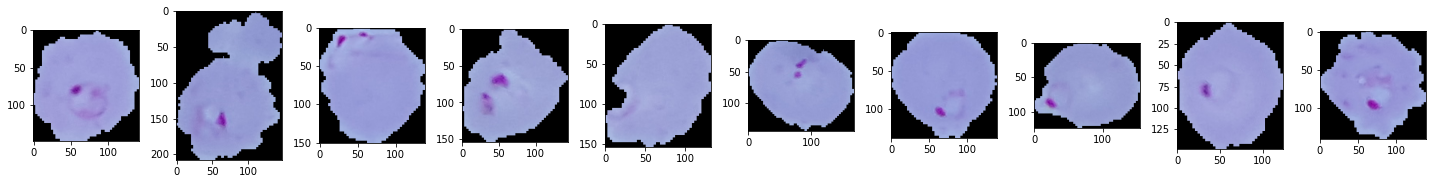


Uninfected Images: 



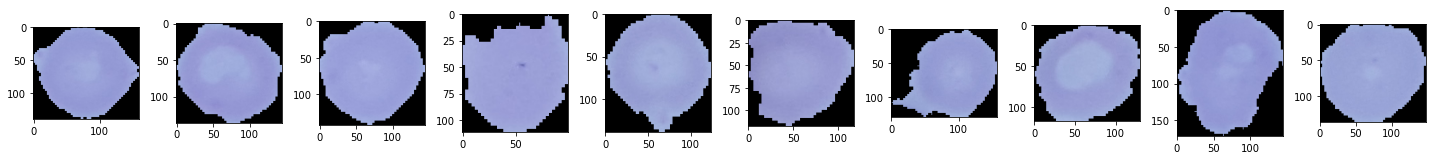

In [13]:
print("Parasitized Images: ")
print()
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Uninfected Images: ")
print()
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of samples according to the categories')

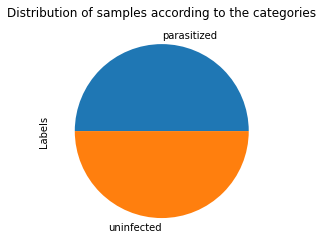

In [14]:
df['Labels'].value_counts().plot(kind = 'pie')
plt.title('Distribution of samples according to the categories')

In [15]:

train, test = train_test_split(df, test_size = .30)

img_datagen = ImageDataGenerator(rotation_range=10,
            width_shift_range=0.2, 
            height_shift_range=0.2,
            zoom_range=0.2, 
            horizontal_flip=True,
            fill_mode='nearest',
            brightness_range=[0.2,1.2], 
            validation_split=0.3)

x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
y_test =  x_test.labels

                               
                               
my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=5),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

D:\anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


Found 13504 validated image filenames belonging to 2 classes.
Found 2480 validated image filenames belonging to 2 classes.


D:\anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [16]:
def plot_loss_and_accuracy(mo_fit,model):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()
    
    
    y_pred_model = model.predict(x_test)
    y_pred_model = y_pred_model[:,0]>0.5
   
    print(classification_report(y_pred = y_pred_model, y_true = y_test))

# RESNET 50


In [9]:
def resnet_model(df, train, test, my_callbacks):
    
    resnet_model=resnet.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=5e-5),loss='binary_crossentropy',metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100,
    epochs = 10, callbacks=my_callbacks)
    
    
    return model_history,model
    


In [10]:
x,y = resnet_model(df, train, test, my_callbacks)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 27,783,041
Trainable params: 27,729,921
Non-trainable params: 53,120
_________________________________________________________________
None
Epoch 1/10
50/50 [==============================] - 46s 733ms/step - loss: 0.9631 - accuracy: 0.5621

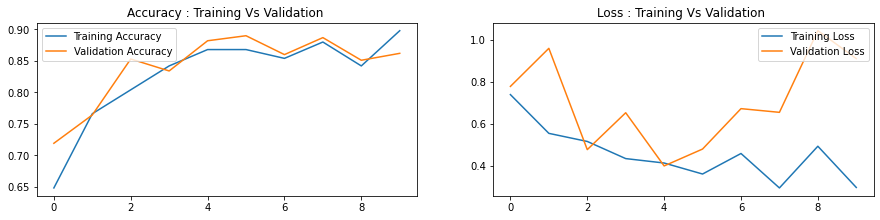

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1240
           1       0.81      0.98      0.89      1240

    accuracy                           0.87      2480
   macro avg       0.89      0.87      0.87      2480
weighted avg       0.89      0.87      0.87      2480



In [11]:
plot_loss_and_accuracy(x,y)

In [9]:
x_train_full =  img_datagen.flow_from_dataframe(dataframe = df,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')

Found 19291 validated image filenames belonging to 2 classes.


D:\anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [10]:
y_train_full = df.Labels

In [11]:
loaded_resnet = load_model("resnet.pkl")

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


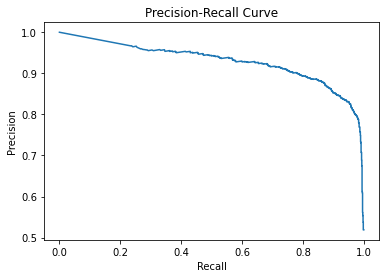

In [15]:
y_score = loaded_resnet.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [16]:
y_pred = loaded_resnet.predict(x_test)
for i in range(0,2480,1):
    if y_pred[i] >= 0.5:
        y_pred[i]=int(1)
    else:
        y_pred[i]=int(0)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 934,  306],
       [  24, 1216]], dtype=int64)

In [17]:
from datetime import datetime
import time
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_resnet.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',i+1,time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  1 148.71294355392456
Time:  2 144.61165261268616
Time:  3 141.90039944648743
Time:  4 126.32851314544678
Time:  5 125.51439428329468
Time:  6 122.7548418045044
Time:  7 123.33573055267334
Time:  8 124.72829008102417
Time:  9 125.32446885108948
Time:  10 131.41453671455383


In [18]:
print("Average time taken = ",sum(time_array)/len(time_array))

Average time taken =  131.46257710456848


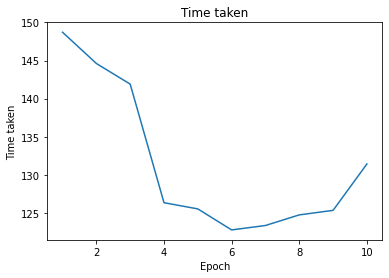

In [19]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

# INCEPTION V3


In [13]:
def inception_v3_model(df, train, test, my_callbacks):
    
    vgg19_model = VGG19(input_shape=(64,64,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=5e-5),loss='binary_crossentropy',metrics=['accuracy'])
    print(model.summary())
    model_history = model.fit(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 10 , callbacks=my_callbacks)
    
    return model_history,model
    


In [14]:
x,y = inception_v3_model(df, train, test, my_callbacks)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 21,073,985
Trainable params: 21,073,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
50/50 [==============================] - 51s 987ms/step - loss: 2.1794 - accuracy: 0.5902 - v

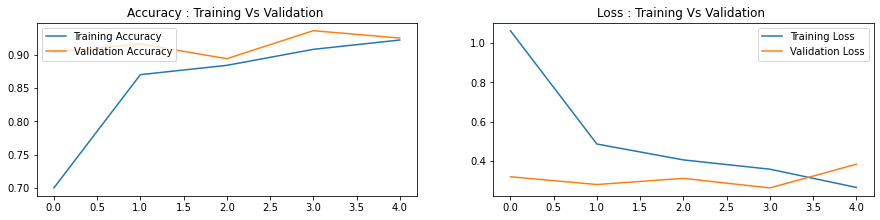

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1233
           1       0.92      0.96      0.94      1247

    accuracy                           0.94      2480
   macro avg       0.94      0.94      0.94      2480
weighted avg       0.94      0.94      0.94      2480



In [15]:
plot_loss_and_accuracy(x,y)

In [12]:
loaded_inception = load_model("inception.pkl")

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


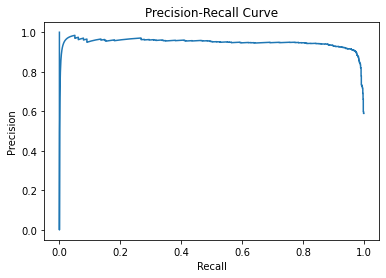

In [34]:
y_score = loaded_inception.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [35]:
from datetime import datetime
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_inception.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  263.2672128677368
Time:  274.7216589450836
Time:  261.88244700431824
Time:  286.92632961273193
Time:  270.91843843460083
Time:  250.88658452033997
Time:  256.9654664993286
Time:  250.80386567115784
Time:  252.39141511917114
Time:  248.42238855361938


In [36]:
print("Average time taken = ",sum(time_array)/len(time_array))

Average time taken =  261.71858072280884


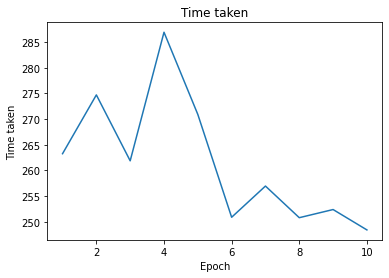

In [37]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

# STACKED CNN

In [13]:
def stacked_model(df, train, test, my_callbacks):
    model = Sequential()
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(lr=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit_generator(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 100 , callbacks=my_callbacks)
    
    model.save("stacked.pkl")

    return model_history,model

In [14]:
x,y = stacked_model(df, train, test, my_callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 6s 113ms/step - loss: 17.4846 - accuracy: 0.4577 - val_loss: 0.7622 - val_accuracy: 0.4720
Epoch 2/100
50/50 [==============================] - 4s 90ms/step - loss: 1.3186 - accuracy: 0.5534 - val_loss: 0.7116 - val_accuracy: 0.4900
Epoch 3/100
50/50 [==============================] - 4s 74ms/step - loss: 1.0028 - accuracy: 0.5041 - val_loss: 0.7049 - val_accuracy: 0.5050
Epoch 4/100
50/50 [==============================] - 4s 84ms/step - loss: 0.7918 - accuracy: 0.5449 - val_loss: 0.6869 - val_accuracy: 0.5620
Epoch 5/100
50/50 [==============================] - 4s 85ms/step - loss: 0.7651 - accuracy: 0.4910 - val_loss: 0.6889 - val_accuracy: 0.5380
Epoch 6/100
50/50 [==============================] - 4s 81ms/step - loss: 0.7529 - accuracy: 0.4593 - val_loss: 0.6885 - val_accuracy: 0.5450
Epoch 7/100
50/50 [==============================] - 4s 80ms/step - loss: 0.7504 - accuracy: 0.4673 - val_loss: 0.6879 - val_accuracy: 0.5830
Epoc

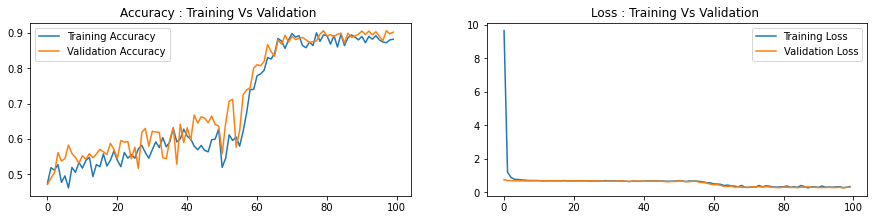

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1309
           1       0.88      0.89      0.88      1171

    accuracy                           0.89      2480
   macro avg       0.89      0.89      0.89      2480
weighted avg       0.89      0.89      0.89      2480



In [15]:
plot_loss_and_accuracy(x,y)

In [16]:
loaded_stacked = load_model("stacked.pkl")

In [17]:
y_pred = loaded_stacked.predict(x_test)
for i in range(0,2480,1):
    if y_pred[i] >= 0.5:
        y_pred[i]=int(1)
    else:
        y_pred[i]=int(0)
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[1155,  154],
       [ 124, 1047]], dtype=int64)

In [21]:
from datetime import datetime
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_stacked.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',i+1,time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  1 77.37844610214233
Time:  2 74.78656101226807
Time:  3 76.85453271865845
Time:  4 86.29780626296997
Time:  5 75.93902397155762
Time:  6 74.82939743995667
Time:  7 74.59138870239258
Time:  8 82.84092354774475
Time:  9 83.26193761825562
Time:  10 86.00019073486328


In [22]:
print('average time = ',sum(time_array)/len(time_array))

average time =  79.27802081108094


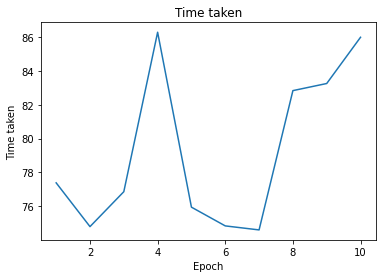

In [23]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

# DEPTHWISE SEPERABLE MODEL

In [54]:
import pickle
import weakref
def ds_model(df, train, test, my_callbacks):
    model = Sequential()
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(lr=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit_generator(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 1000 , callbacks=my_callbacks)
    
    model.save("custom.pkl")

    return model_history,model

In [55]:
x,y = ds_model(df, train, test, my_callbacks)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 12, 12, 64)       

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 7s 117ms/step - loss: 1.1153 - accuracy: 0.4904 - val_loss: 0.6968 - val_accuracy: 0.4800
Epoch 2/1000
50/50 [==============================] - 5s 100ms/step - loss: 0.7135 - accuracy: 0.5646 - val_loss: 0.6926 - val_accuracy: 0.5140
Epoch 3/1000
50/50 [==============================] - 5s 102ms/step - loss: 0.6876 - accuracy: 0.5510 - val_loss: 0.6915 - val_accuracy: 0.5150
Epoch 4/1000
50/50 [==============================] - 5s 95ms/step - loss: 0.7064 - accuracy: 0.5236 - val_loss: 0.6912 - val_accuracy: 0.5260
Epoch 5/1000
50/50 [==============================] - 8s 155ms/step - loss: 0.6987 - accuracy: 0.4991 - val_loss: 0.6904 - val_accuracy: 0.5290
Epoch 6/1000
50/50 [==============================] - 4s 83ms/step - loss: 0.6929 - accuracy: 0.5488 - val_loss: 0.6884 - val_accuracy: 0.5870
Epoch 7/1000
50/50 [==============================] - 4s 80ms/step - loss: 0.6828 - accuracy: 0.5758 - val_loss: 0.6834 - val_accuracy: 0.5920
Epoch 8/

50/50 [==============================] - 5s 96ms/step - loss: 0.4737 - accuracy: 0.8299 - val_loss: 0.4497 - val_accuracy: 0.8050
Epoch 59/1000
50/50 [==============================] - 4s 89ms/step - loss: 0.3627 - accuracy: 0.8781 - val_loss: 0.3950 - val_accuracy: 0.8530
Epoch 60/1000
50/50 [==============================] - 5s 100ms/step - loss: 0.3147 - accuracy: 0.8866 - val_loss: 0.3750 - val_accuracy: 0.8700
Epoch 61/1000
50/50 [==============================] - 4s 85ms/step - loss: 0.5080 - accuracy: 0.8300 - val_loss: 0.3865 - val_accuracy: 0.8470
Epoch 62/1000
50/50 [==============================] - 4s 76ms/step - loss: 0.4001 - accuracy: 0.8222 - val_loss: 0.3904 - val_accuracy: 0.8860
Epoch 63/1000
50/50 [==============================] - 4s 82ms/step - loss: 0.5400 - accuracy: 0.8891 - val_loss: 0.3825 - val_accuracy: 0.8520
Epoch 64/1000
50/50 [==============================] - 5s 107ms/step - loss: 0.3925 - accuracy: 0.8660 - val_loss: 0.3642 - val_accuracy: 0.8640
Epoc

Epoch 115/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3324 - accuracy: 0.9055 - val_loss: 0.2642 - val_accuracy: 0.9150
Epoch 116/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.2165 - accuracy: 0.9457 - val_loss: 0.2813 - val_accuracy: 0.9080
Epoch 117/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2397 - accuracy: 0.9146 - val_loss: 0.2908 - val_accuracy: 0.9020
Epoch 118/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.2818 - accuracy: 0.9037 - val_loss: 0.3094 - val_accuracy: 0.9010
Epoch 119/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2557 - accuracy: 0.9167 - val_loss: 0.3166 - val_accuracy: 0.8840
Epoch 120/1000
50/50 [==============================] - 4s 86ms/step - loss: 0.3293 - accuracy: 0.8798 - val_loss: 0.2896 - val_accuracy: 0.9030
Epoch 121/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.2916 - accuracy: 0.9124 - val_loss: 0.2818 - val_ac

50/50 [==============================] - 3s 69ms/step - loss: 0.3029 - accuracy: 0.9049 - val_loss: 0.2658 - val_accuracy: 0.9170
Epoch 228/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2384 - accuracy: 0.9159 - val_loss: 0.2728 - val_accuracy: 0.9110
Epoch 229/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2890 - accuracy: 0.9025 - val_loss: 0.2761 - val_accuracy: 0.9040
Epoch 230/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3184 - accuracy: 0.8731 - val_loss: 0.2923 - val_accuracy: 0.9060
Epoch 231/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2867 - accuracy: 0.8859 - val_loss: 0.2700 - val_accuracy: 0.9150
Epoch 232/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2641 - accuracy: 0.8986 - val_loss: 0.3020 - val_accuracy: 0.9040
Epoch 233/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.2226 - accuracy: 0.9344 - val_loss: 0.2602 - val_accuracy: 0.9150


50/50 [==============================] - 3s 70ms/step - loss: 0.2629 - accuracy: 0.9156 - val_loss: 0.2758 - val_accuracy: 0.8860
Epoch 340/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3291 - accuracy: 0.9088 - val_loss: 0.2603 - val_accuracy: 0.9140
Epoch 341/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2360 - accuracy: 0.9117 - val_loss: 0.2756 - val_accuracy: 0.9160
Epoch 342/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2876 - accuracy: 0.9213 - val_loss: 0.2758 - val_accuracy: 0.9080
Epoch 343/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2542 - accuracy: 0.9103 - val_loss: 0.2717 - val_accuracy: 0.9170
Epoch 344/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2483 - accuracy: 0.9170 - val_loss: 0.2419 - val_accuracy: 0.9190
Epoch 345/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2416 - accuracy: 0.9114 - val_loss: 0.3196 - val_accuracy: 0.8550


50/50 [==============================] - 3s 68ms/step - loss: 0.2818 - accuracy: 0.9121 - val_loss: 0.2705 - val_accuracy: 0.8960
Epoch 452/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3145 - accuracy: 0.8851 - val_loss: 0.2701 - val_accuracy: 0.9150
Epoch 453/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2653 - accuracy: 0.9119 - val_loss: 0.2454 - val_accuracy: 0.9200
Epoch 454/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2559 - accuracy: 0.9140 - val_loss: 0.2461 - val_accuracy: 0.9210
Epoch 455/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2479 - accuracy: 0.9111 - val_loss: 0.2628 - val_accuracy: 0.9120
Epoch 456/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3056 - accuracy: 0.9236 - val_loss: 0.2594 - val_accuracy: 0.9130
Epoch 457/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2143 - accuracy: 0.9146 - val_loss: 0.2667 - val_accuracy: 0.9100


50/50 [==============================] - 4s 76ms/step - loss: 0.2836 - accuracy: 0.8922 - val_loss: 0.2700 - val_accuracy: 0.9130
Epoch 564/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.1740 - accuracy: 0.9301 - val_loss: 0.2526 - val_accuracy: 0.9180
Epoch 565/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.2488 - accuracy: 0.8970 - val_loss: 0.2698 - val_accuracy: 0.9170
Epoch 566/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.2165 - accuracy: 0.9354 - val_loss: 0.2625 - val_accuracy: 0.9200
Epoch 567/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.2408 - accuracy: 0.9136 - val_loss: 0.2540 - val_accuracy: 0.9160
Epoch 568/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.3299 - accuracy: 0.8946 - val_loss: 0.2317 - val_accuracy: 0.9240
Epoch 569/1000
50/50 [==============================] - 4s 76ms/step - loss: 0.2542 - accuracy: 0.9147 - val_loss: 0.2480 - val_accuracy: 0.9200


50/50 [==============================] - 4s 79ms/step - loss: 0.2358 - accuracy: 0.9277 - val_loss: 0.2468 - val_accuracy: 0.9200
Epoch 676/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.3390 - accuracy: 0.9178 - val_loss: 0.2605 - val_accuracy: 0.9200
Epoch 677/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.2516 - accuracy: 0.9122 - val_loss: 0.2653 - val_accuracy: 0.9120
Epoch 678/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.2369 - accuracy: 0.9315 - val_loss: 0.2768 - val_accuracy: 0.9070
Epoch 679/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.2938 - accuracy: 0.9082 - val_loss: 0.2721 - val_accuracy: 0.9150
Epoch 680/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.2517 - accuracy: 0.9198 - val_loss: 0.2447 - val_accuracy: 0.9180
Epoch 681/1000
50/50 [==============================] - 4s 80ms/step - loss: 0.2962 - accuracy: 0.9080 - val_loss: 0.2650 - val_accuracy: 0.9220


50/50 [==============================] - 5s 91ms/step - loss: 0.2817 - accuracy: 0.8949 - val_loss: 0.2422 - val_accuracy: 0.9300
Epoch 788/1000
50/50 [==============================] - 4s 89ms/step - loss: 0.2619 - accuracy: 0.9018 - val_loss: 0.2254 - val_accuracy: 0.9280
Epoch 789/1000
50/50 [==============================] - 4s 82ms/step - loss: 0.1890 - accuracy: 0.9462 - val_loss: 0.2485 - val_accuracy: 0.9080
Epoch 790/1000
50/50 [==============================] - 4s 81ms/step - loss: 0.2258 - accuracy: 0.9201 - val_loss: 0.2487 - val_accuracy: 0.9110
Epoch 791/1000
50/50 [==============================] - 4s 82ms/step - loss: 0.2696 - accuracy: 0.9037 - val_loss: 0.2536 - val_accuracy: 0.9090
Epoch 792/1000
50/50 [==============================] - 4s 81ms/step - loss: 0.1830 - accuracy: 0.9472 - val_loss: 0.2388 - val_accuracy: 0.9310
Epoch 793/1000
50/50 [==============================] - 4s 80ms/step - loss: 0.2347 - accuracy: 0.9322 - val_loss: 0.2521 - val_accuracy: 0.9170


50/50 [==============================] - 4s 79ms/step - loss: 0.2028 - accuracy: 0.9221 - val_loss: 0.2205 - val_accuracy: 0.9270
Epoch 900/1000
50/50 [==============================] - 5s 100ms/step - loss: 0.1896 - accuracy: 0.9429 - val_loss: 0.2755 - val_accuracy: 0.9110
Epoch 901/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.1909 - accuracy: 0.9433 - val_loss: 0.2299 - val_accuracy: 0.9270
Epoch 902/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.2666 - accuracy: 0.9058 - val_loss: 0.2339 - val_accuracy: 0.9260
Epoch 903/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.3049 - accuracy: 0.8950 - val_loss: 0.2535 - val_accuracy: 0.9140 - accuracy
Epoch 904/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.2366 - accuracy: 0.9241 - val_loss: 0.2401 - val_accuracy: 0.9160
Epoch 905/1000
50/50 [==============================] - 4s 80ms/step - loss: 0.2854 - accuracy: 0.9172 - val_loss: 0.2541 - val_accur

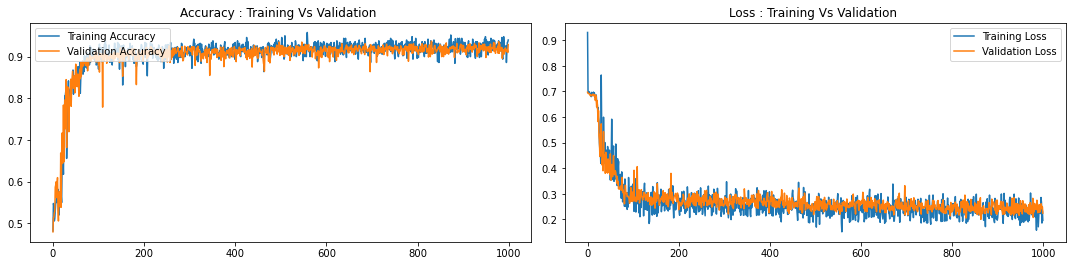

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1233
           1       0.89      0.97      0.93      1247

    accuracy                           0.93      2480
   macro avg       0.93      0.93      0.93      2480
weighted avg       0.93      0.93      0.93      2480



In [56]:
plot_loss_and_accuracy(x,y)

In [24]:
loaded_custom = load_model("custom.pkl")

In [58]:
y_pred = loaded_custom.predict(x_test)
for i in range(0,2480,1):
    if y_pred[i] >= 0.5:
        y_pred[i]=int(1)
    else:
        y_pred[i]=int(0)

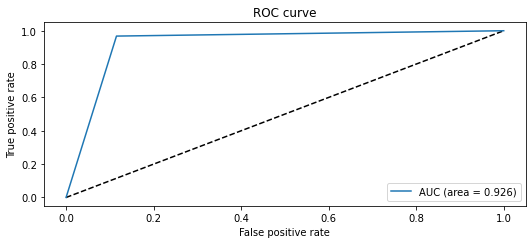

In [59]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='AUC (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [60]:
print('AUC = ',auc_rf)

AUC =  0.9263783770424526


D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


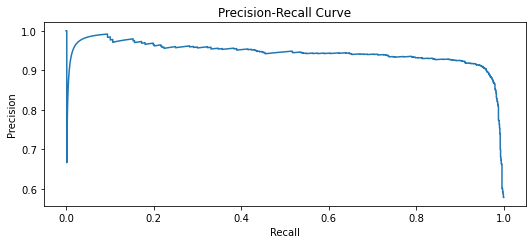

In [61]:
y_score = loaded_custom.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [62]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[1091,  142],
       [  40, 1207]], dtype=int64)

<AxesSubplot:>

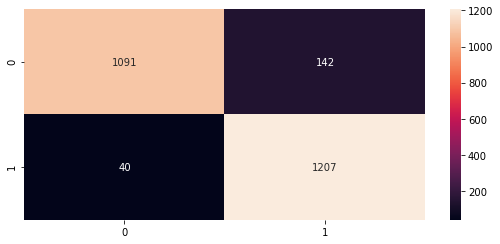

In [63]:
import seaborn as sns
sns.heatmap(cf, annot=True,fmt='g')

In [17]:
spec = cf[1][1]/(cf[1][1]+cf[0][1])
print('specificity = ',spec)

specificity =  0.8875562218890555


In [25]:
from datetime import datetime
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_custom.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',i+1,time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  1 37.48677349090576
Time:  2 37.5995831489563
Time:  3 37.69431924819946
Time:  4 37.7971453666687
Time:  5 37.069544553756714
Time:  6 37.58294486999512
Time:  7 36.788808822631836
Time:  8 36.671162366867065
Time:  9 36.773940086364746
Time:  10 36.814534425735474


In [26]:
print("Average time taken = ",sum(time_array)/len(time_array))

Average time taken =  37.227875638008115


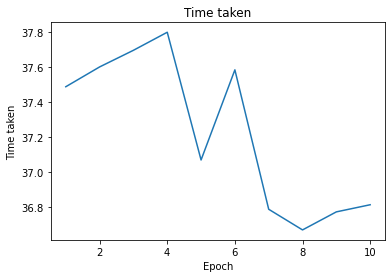

In [27]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

# Testing Optimizers


In [17]:
import pickle
import weakref
def ds_model(df, train, test, my_callbacks):
    model = Sequential()
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit_generator(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 1000 , callbacks=my_callbacks)
    
    model.save("customRMS.pkl")

    return model_history,model

In [18]:
x,y = ds_model(df, train, test, my_callbacks)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 12, 12, 32)       

Epoch 41/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.4218 - accuracy: 0.8533 - val_loss: 0.3877 - val_accuracy: 0.8600
Epoch 42/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3858 - accuracy: 0.8449 - val_loss: 0.3606 - val_accuracy: 0.8680
Epoch 43/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4060 - accuracy: 0.8713 - val_loss: 0.3216 - val_accuracy: 0.8900
Epoch 44/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3798 - accuracy: 0.8777 - val_loss: 0.3150 - val_accuracy: 0.8790
Epoch 45/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3399 - accuracy: 0.8817 - val_loss: 0.3170 - val_accuracy: 0.8800
Epoch 46/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3458 - accuracy: 0.8707 - val_loss: 0.3419 - val_accuracy: 0.8650
Epoch 47/1000
50/50 [==============================] - 4s 80ms/step - loss: 0.3983 - accuracy: 0.8584 - val_loss: 0.3386 - val_accuracy:

Epoch 98/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2521 - accuracy: 0.9248 - val_loss: 0.2932 - val_accuracy: 0.8980
Epoch 99/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4397 - accuracy: 0.8551 - val_loss: 0.2904 - val_accuracy: 0.9050
Epoch 100/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2575 - accuracy: 0.9158 - val_loss: 0.2854 - val_accuracy: 0.8980
Epoch 101/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2683 - accuracy: 0.9352 - val_loss: 0.2844 - val_accuracy: 0.9020
Epoch 102/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2602 - accuracy: 0.9137 - val_loss: 0.2978 - val_accuracy: 0.8870
Epoch 103/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2646 - accuracy: 0.9154 - val_loss: 0.3236 - val_accuracy: 0.9060
Epoch 104/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4207 - accuracy: 0.8772 - val_loss: 0.3259 - val_accu

50/50 [==============================] - 3s 66ms/step - loss: 0.3036 - accuracy: 0.8961 - val_loss: 0.3573 - val_accuracy: 0.8690
Epoch 211/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4314 - accuracy: 0.8889 - val_loss: 0.3316 - val_accuracy: 0.8830
Epoch 212/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3664 - accuracy: 0.8947 - val_loss: 0.3172 - val_accuracy: 0.8830
Epoch 213/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2897 - accuracy: 0.8902 - val_loss: 0.3554 - val_accuracy: 0.8820
Epoch 214/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3116 - accuracy: 0.8950 - val_loss: 0.2777 - val_accuracy: 0.8980
Epoch 215/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.5452 - accuracy: 0.8838 - val_loss: 0.3180 - val_accuracy: 0.8690
Epoch 216/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3361 - accuracy: 0.8979 - val_loss: 0.2952 - val_accuracy: 0.8900


50/50 [==============================] - 3s 66ms/step - loss: 0.3370 - accuracy: 0.8907 - val_loss: 0.4459 - val_accuracy: 0.8280
Epoch 323/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.8652 - accuracy: 0.8349 - val_loss: 0.2528 - val_accuracy: 0.9150
Epoch 324/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3260 - accuracy: 0.8843 - val_loss: 0.3646 - val_accuracy: 0.9030
Epoch 325/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.2561 - accuracy: 0.9166 - val_loss: 0.2897 - val_accuracy: 0.9070
Epoch 326/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.8043 - accuracy: 0.8860 - val_loss: 0.3642 - val_accuracy: 0.8620
Epoch 327/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3379 - accuracy: 0.8741 - val_loss: 0.3897 - val_accuracy: 0.8900
Epoch 328/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4616 - accuracy: 0.8861 - val_loss: 0.3649 - val_accuracy: 0.8660


50/50 [==============================] - 3s 66ms/step - loss: 0.3693 - accuracy: 0.8797 - val_loss: 0.2846 - val_accuracy: 0.9010
Epoch 435/1000
50/50 [==============================] - 3s 66ms/step - loss: 1.2150 - accuracy: 0.8832 - val_loss: 0.3303 - val_accuracy: 0.8680
Epoch 436/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3473 - accuracy: 0.8626 - val_loss: 0.3463 - val_accuracy: 0.9160
Epoch 437/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.3330 - accuracy: 0.9085 - val_loss: 0.2820 - val_accuracy: 0.9070
Epoch 438/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.5489 - accuracy: 0.8896 - val_loss: 0.3754 - val_accuracy: 0.8480
Epoch 439/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.6324 - accuracy: 0.8213 - val_loss: 0.3426 - val_accuracy: 0.8570
Epoch 440/1000
50/50 [==============================] - 3s 66ms/step - loss: 1.1802 - accuracy: 0.9089 - val_loss: 0.3252 - val_accuracy: 0.8950


50/50 [==============================] - 3s 66ms/step - loss: 0.3549 - accuracy: 0.8739 - val_loss: 0.3306 - val_accuracy: 0.8650
Epoch 547/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4095 - accuracy: 0.8907 - val_loss: 0.3621 - val_accuracy: 0.8550
Epoch 548/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4600 - accuracy: 0.8694 - val_loss: 0.3876 - val_accuracy: 0.8290
Epoch 549/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.5173 - accuracy: 0.8053 - val_loss: 0.4396 - val_accuracy: 0.9110
Epoch 550/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2998 - accuracy: 0.9017 - val_loss: 0.4376 - val_accuracy: 0.8960
Epoch 551/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4049 - accuracy: 0.8462 - val_loss: 0.3886 - val_accuracy: 0.8610
Epoch 552/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.7933 - accuracy: 0.8287 - val_loss: 0.4111 - val_accuracy: 0.8120


50/50 [==============================] - 5s 95ms/step - loss: 0.4792 - accuracy: 0.8674 - val_loss: 0.3718 - val_accuracy: 0.8670
Epoch 659/1000
50/50 [==============================] - 6s 122ms/step - loss: 0.3190 - accuracy: 0.8740 - val_loss: 0.3724 - val_accuracy: 0.8660
Epoch 660/1000
50/50 [==============================] - 4s 83ms/step - loss: 0.5463 - accuracy: 0.8077 - val_loss: 0.3404 - val_accuracy: 0.8640
Epoch 661/1000
50/50 [==============================] - 5s 108ms/step - loss: 0.8115 - accuracy: 0.8003 - val_loss: 0.3491 - val_accuracy: 0.8750
Epoch 662/1000
50/50 [==============================] - 4s 85ms/step - loss: 0.3517 - accuracy: 0.8618 - val_loss: 0.3539 - val_accuracy: 0.8520
Epoch 663/1000
50/50 [==============================] - 5s 92ms/step - loss: 0.4780 - accuracy: 0.8010 - val_loss: 0.3777 - val_accuracy: 0.8320
Epoch 664/1000
50/50 [==============================] - 5s 96ms/step - loss: 0.8563 - accuracy: 0.7568 - val_loss: 0.4167 - val_accuracy: 0.813

50/50 [==============================] - 4s 86ms/step - loss: 0.8045 - accuracy: 0.7910 - val_loss: 0.3519 - val_accuracy: 0.8630
Epoch 771/1000
50/50 [==============================] - 5s 92ms/step - loss: 0.8630 - accuracy: 0.7654 - val_loss: 0.3687 - val_accuracy: 0.8620
Epoch 772/1000
50/50 [==============================] - 4s 83ms/step - loss: 0.4668 - accuracy: 0.8443 - val_loss: 0.5104 - val_accuracy: 0.7470
Epoch 773/1000
50/50 [==============================] - 5s 92ms/step - loss: 1.3586 - accuracy: 0.7560 - val_loss: 0.4062 - val_accuracy: 0.8600
Epoch 774/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.6028 - accuracy: 0.8241 - val_loss: 0.3920 - val_accuracy: 0.8870
Epoch 775/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.5767 - accuracy: 0.8840 - val_loss: 0.3603 - val_accuracy: 0.8500
Epoch 776/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.5346 - accuracy: 0.7990 - val_loss: 0.4995 - val_accuracy: 0.7500


50/50 [==============================] - 3s 69ms/step - loss: 0.6466 - accuracy: 0.7453 - val_loss: 0.4026 - val_accuracy: 0.8200
Epoch 883/1000
50/50 [==============================] - 4s 75ms/step - loss: 0.3728 - accuracy: 0.8518 - val_loss: 0.3928 - val_accuracy: 0.8730
Epoch 884/1000
50/50 [==============================] - 4s 90ms/step - loss: 0.5486 - accuracy: 0.8476 - val_loss: 0.4385 - val_accuracy: 0.8770
Epoch 885/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.7722 - accuracy: 0.8423 - val_loss: 0.6936 - val_accuracy: 0.6160
Epoch 886/1000
50/50 [==============================] - 4s 82ms/step - loss: 0.8329 - accuracy: 0.6760 - val_loss: 0.3815 - val_accuracy: 0.8510
Epoch 887/1000
50/50 [==============================] - 4s 72ms/step - loss: 0.4468 - accuracy: 0.8693 - val_loss: 0.6476 - val_accuracy: 0.9020
Epoch 888/1000
50/50 [==============================] - 4s 76ms/step - loss: 0.4048 - accuracy: 0.8443 - val_loss: 0.4288 - val_accuracy: 0.8930


50/50 [==============================] - 4s 73ms/step - loss: 1.2255 - accuracy: 0.7644 - val_loss: 0.5244 - val_accuracy: 0.7220
Epoch 995/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.5581 - accuracy: 0.8078 - val_loss: 0.3825 - val_accuracy: 0.8350
Epoch 996/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.8682 - accuracy: 0.8431 - val_loss: 0.4600 - val_accuracy: 0.7770
Epoch 997/1000
50/50 [==============================] - 4s 72ms/step - loss: 0.4956 - accuracy: 0.8254 - val_loss: 0.6078 - val_accuracy: 0.6660
Epoch 998/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.5965 - accuracy: 0.7053 - val_loss: 0.3818 - val_accuracy: 0.8530
Epoch 999/1000
50/50 [==============================] - 4s 72ms/step - loss: 0.3918 - accuracy: 0.8731 - val_loss: 0.6735 - val_accuracy: 0.8730
Epoch 1000/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.7724 - accuracy: 0.7978 - val_loss: 0.3761 - val_accuracy: 0.8320

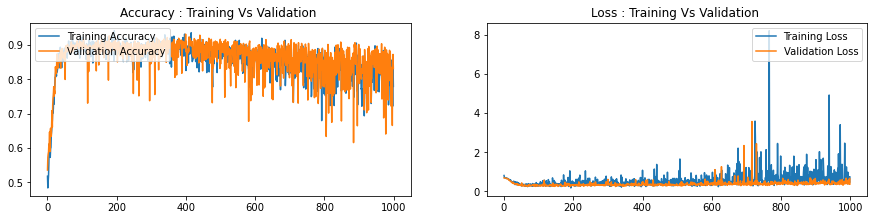

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1211
           1       0.76      0.99      0.86      1269

    accuracy                           0.83      2480
   macro avg       0.87      0.83      0.83      2480
weighted avg       0.87      0.83      0.83      2480



In [19]:
plot_loss_and_accuracy(x,y)

In [20]:
import pickle
import weakref
def ds_model(df, train, test, my_callbacks):
    model = Sequential()
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.SGD(lr=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit_generator(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 1000 , callbacks=my_callbacks)
    
    model.save("customSGD.pkl")

    return model_history,model

In [21]:
x,y = ds_model(df, train, test, my_callbacks)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_6 (Separabl (None, 12, 12, 32)       

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 4s 70ms/step - loss: 1.1422 - accuracy: 0.5015 - val_loss: 0.6972 - val_accuracy: 0.5170
Epoch 2/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.8556 - accuracy: 0.5496 - val_loss: 0.6916 - val_accuracy: 0.5050
Epoch 3/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.7429 - accuracy: 0.5092 - val_loss: 0.6927 - val_accuracy: 0.5040
Epoch 4/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.7462 - accuracy: 0.5034 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 5/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.7720 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 6/1000
50/50 [==============================] - 4s 72ms/step - loss: 0.7240 - accuracy: 0.4803 - val_loss: 0.6876 - val_accuracy: 0.5300
Epoch 7/1000
50/50 [==============================] - 4s 76ms/step - loss: 0.6995 - accuracy: 0.5325 - val_loss: 0.6913 - val_accuracy: 0.5190
Epoch 8/1000

50/50 [==============================] - 3s 69ms/step - loss: 0.6810 - accuracy: 0.5392 - val_loss: 0.6783 - val_accuracy: 0.6000
Epoch 59/1000
50/50 [==============================] - 5s 91ms/step - loss: 0.6571 - accuracy: 0.6311 - val_loss: 0.6755 - val_accuracy: 0.5950
Epoch 60/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.6747 - accuracy: 0.6036 - val_loss: 0.6776 - val_accuracy: 0.5850
Epoch 61/1000
50/50 [==============================] - 4s 73ms/step - loss: 0.6858 - accuracy: 0.5197 - val_loss: 0.6758 - val_accuracy: 0.6070
Epoch 62/1000
50/50 [==============================] - 4s 83ms/step - loss: 0.6794 - accuracy: 0.5652 - val_loss: 0.6763 - val_accuracy: 0.6320
Epoch 63/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.6780 - accuracy: 0.5778 - val_loss: 0.6734 - val_accuracy: 0.6210
Epoch 64/1000
50/50 [==============================] - 4s 78ms/step - loss: 0.6810 - accuracy: 0.5209 - val_loss: 0.6756 - val_accuracy: 0.5880
Epoch 

Epoch 115/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.6559 - accuracy: 0.6463 - val_loss: 0.6386 - val_accuracy: 0.6740
Epoch 116/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.6518 - accuracy: 0.6170 - val_loss: 0.6483 - val_accuracy: 0.6940
Epoch 117/1000
50/50 [==============================] - 4s 72ms/step - loss: 0.6375 - accuracy: 0.6424 - val_loss: 0.6465 - val_accuracy: 0.6910
Epoch 118/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.6473 - accuracy: 0.6038 - val_loss: 0.6457 - val_accuracy: 0.6870
Epoch 119/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.6457 - accuracy: 0.6454 - val_loss: 0.6428 - val_accuracy: 0.7020
Epoch 120/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.6313 - accuracy: 0.6563 - val_loss: 0.6469 - val_accuracy: 0.6710
Epoch 121/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.6837 - accuracy: 0.6107 - val_loss: 0.6429 - val_ac

50/50 [==============================] - 4s 84ms/step - loss: 0.5012 - accuracy: 0.7732 - val_loss: 0.5147 - val_accuracy: 0.8220
Epoch 228/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.5136 - accuracy: 0.7808 - val_loss: 0.5119 - val_accuracy: 0.8120
Epoch 229/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.5514 - accuracy: 0.7582 - val_loss: 0.5166 - val_accuracy: 0.8300
Epoch 230/1000
50/50 [==============================] - 4s 75ms/step - loss: 0.4699 - accuracy: 0.8161 - val_loss: 0.5213 - val_accuracy: 0.8470
Epoch 231/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.6175 - accuracy: 0.7874 - val_loss: 0.4997 - val_accuracy: 0.8050
Epoch 232/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.5315 - accuracy: 0.7729 - val_loss: 0.5047 - val_accuracy: 0.8080
Epoch 233/1000
50/50 [==============================] - 4s 72ms/step - loss: 0.4633 - accuracy: 0.8440 - val_loss: 0.5431 - val_accuracy: 0.7820


50/50 [==============================] - 3s 67ms/step - loss: 0.4093 - accuracy: 0.8665 - val_loss: 0.3656 - val_accuracy: 0.8810
Epoch 340/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4024 - accuracy: 0.8502 - val_loss: 0.3871 - val_accuracy: 0.8590
Epoch 341/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4007 - accuracy: 0.8369 - val_loss: 0.3890 - val_accuracy: 0.8500
Epoch 342/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.4130 - accuracy: 0.8222 - val_loss: 0.3874 - val_accuracy: 0.8480
Epoch 343/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.4191 - accuracy: 0.8506 - val_loss: 0.3808 - val_accuracy: 0.8560
Epoch 344/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3955 - accuracy: 0.8501 - val_loss: 0.3896 - val_accuracy: 0.8530
Epoch 345/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3815 - accuracy: 0.8681 - val_loss: 0.3583 - val_accuracy: 0.8690


50/50 [==============================] - 3s 68ms/step - loss: 0.3701 - accuracy: 0.8468 - val_loss: 0.3397 - val_accuracy: 0.8680
Epoch 452/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3621 - accuracy: 0.8676 - val_loss: 0.3292 - val_accuracy: 0.8840
Epoch 453/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4137 - accuracy: 0.8676 - val_loss: 0.3595 - val_accuracy: 0.8650
Epoch 454/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3510 - accuracy: 0.8630 - val_loss: 0.3751 - val_accuracy: 0.8520
Epoch 455/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3936 - accuracy: 0.8615 - val_loss: 0.3703 - val_accuracy: 0.8580
Epoch 456/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3916 - accuracy: 0.8386 - val_loss: 0.3412 - val_accuracy: 0.8690
Epoch 457/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.4013 - accuracy: 0.8477 - val_loss: 0.3352 - val_accuracy: 0.8780


50/50 [==============================] - 3s 66ms/step - loss: 0.3356 - accuracy: 0.8674 - val_loss: 0.3055 - val_accuracy: 0.8880
Epoch 564/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2892 - accuracy: 0.8880 - val_loss: 0.3305 - val_accuracy: 0.8730
Epoch 565/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.4968 - accuracy: 0.8227 - val_loss: 0.3667 - val_accuracy: 0.8590
Epoch 566/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3605 - accuracy: 0.8474 - val_loss: 0.3520 - val_accuracy: 0.8710
Epoch 567/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2937 - accuracy: 0.8976 - val_loss: 0.3355 - val_accuracy: 0.8790
Epoch 568/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.6732 - accuracy: 0.8310 - val_loss: 0.3461 - val_accuracy: 0.8770
Epoch 569/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3420 - accuracy: 0.8687 - val_loss: 0.3505 - val_accuracy: 0.8770


50/50 [==============================] - 3s 67ms/step - loss: 0.3235 - accuracy: 0.8896 - val_loss: 0.3306 - val_accuracy: 0.8810
Epoch 676/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3130 - accuracy: 0.8629 - val_loss: 0.3357 - val_accuracy: 0.8800
Epoch 677/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3394 - accuracy: 0.8645 - val_loss: 0.3189 - val_accuracy: 0.8880
Epoch 678/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2741 - accuracy: 0.9111 - val_loss: 0.3101 - val_accuracy: 0.8890
Epoch 679/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4345 - accuracy: 0.8401 - val_loss: 0.3112 - val_accuracy: 0.8880
Epoch 680/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4274 - accuracy: 0.8740 - val_loss: 0.3425 - val_accuracy: 0.8690
Epoch 681/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3341 - accuracy: 0.8663 - val_loss: 0.3354 - val_accuracy: 0.8760


50/50 [==============================] - 3s 68ms/step - loss: 0.3558 - accuracy: 0.8832 - val_loss: 0.2830 - val_accuracy: 0.9050
Epoch 788/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3736 - accuracy: 0.9283 - val_loss: 0.3069 - val_accuracy: 0.8940
Epoch 789/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3104 - accuracy: 0.8944 - val_loss: 0.2809 - val_accuracy: 0.9140
Epoch 790/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.2859 - accuracy: 0.9187 - val_loss: 0.3000 - val_accuracy: 0.8950
Epoch 791/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.4033 - accuracy: 0.8436 - val_loss: 0.3081 - val_accuracy: 0.8910
Epoch 792/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2791 - accuracy: 0.9053 - val_loss: 0.3015 - val_accuracy: 0.8940
Epoch 793/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2590 - accuracy: 0.9163 - val_loss: 0.3052 - val_accuracy: 0.8880


50/50 [==============================] - 3s 67ms/step - loss: 0.2912 - accuracy: 0.8951 - val_loss: 0.2988 - val_accuracy: 0.8960
Epoch 900/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3924 - accuracy: 0.8848 - val_loss: 0.3090 - val_accuracy: 0.8860
Epoch 901/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3656 - accuracy: 0.9063 - val_loss: 0.3081 - val_accuracy: 0.8980
Epoch 902/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3140 - accuracy: 0.8792 - val_loss: 0.2909 - val_accuracy: 0.9010
Epoch 903/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2876 - accuracy: 0.8999 - val_loss: 0.2961 - val_accuracy: 0.8900
Epoch 904/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2607 - accuracy: 0.9151 - val_loss: 0.2779 - val_accuracy: 0.9060
Epoch 905/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2862 - accuracy: 0.8906 - val_loss: 0.2841 - val_accuracy: 0.8960


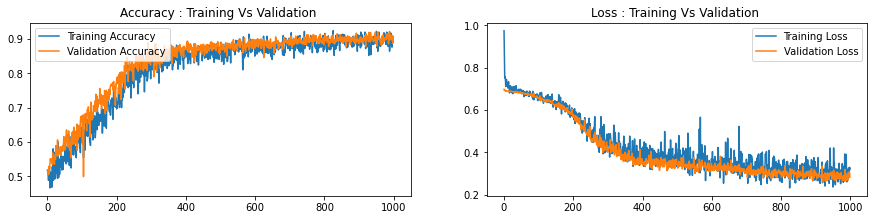

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1211
           1       0.87      0.95      0.91      1269

    accuracy                           0.91      2480
   macro avg       0.91      0.90      0.90      2480
weighted avg       0.91      0.91      0.90      2480



In [22]:
plot_loss_and_accuracy(x,y)

# graphs

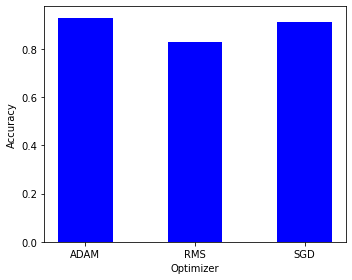

In [28]:
data = {'ADAM':0.93, 'RMS':0.83, 'SGD':0.91,}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 4))
 
plt.bar(courses, values, color ='blue',
        width = 0.5)
 
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.show()

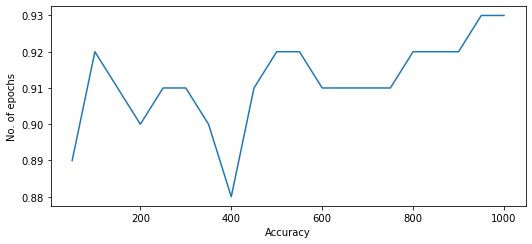

In [66]:
accuracy_array=[0.89,0.92,0.91,0.90,0.91,0.91,0.90,0.88,0.91,0.92,0.92,0.91,0.91,0.91,0.91,0.92,0.92,0.92,0.93,0.93]
epochs = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

y=np.array(accuracy_array)
x=np.array(epochs)

plt.xlabel('Accuracy')
plt.ylabel('No. of epochs')
plt.plot(x, y)  
plt.show()

In [10]:
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(loaded_inception,to_file='inceparchi.png',legend=True).show()